In [1]:
import os
# import geopandas as gpd
from shapely.geometry import Point, Polygon
import pandas as pd
import numpy as np
from scipy.spatial import ConvexHull, convex_hull_plot_2d

import matplotlib.pyplot as plt
from cycler import cycler
import glob
from pykml import parser 
import re
# import pymap3d

import seaborn as sns
# %matplotlib qt

In [2]:
def gLab_output_to_numpy(output_file):

    NEU_START,NEU_END = 17,20

    with open(output_file,'r') as f:

        # list(map(float,l.split()[NEU_START:NEU_END]))
        lines = f.readlines()
        neu=np.array([list(map(float,l.split()[NEU_START:NEU_END])) for l in lines if re.match('OUTPUT*', l)])#.reshape(3,-1)
        epochs = np.array([float(l.split()[3]) for l in lines if re.match('OUTPUT*', l)])
        # print(output_lines)

        return neu,epochs

In [70]:
# period_folder = 'quiet'
# period_folder = 'disturbance'
period_folder = 'cme'
# files_folder = os.path.join('gLAB','outputs','disturbance')
files_folder = os.path.join('gLAB','outputs',period_folder)

# outtest = glob.glob(os.path.join(files_folder,'gLAB_25_02_2014_c1p.out'))[0]

# c1p_kml = glob.glob(os.path.join(files_folder,'*c1p.kml'))[0]
# dmd_kmls = glob.glob(os.path.join(files_folder,'dmd*.kml'))

glab_outputs = glob.glob(os.path.join(files_folder,'*.out'))
glab_outputs

['gLAB\\outputs\\cme\\gLAB_01_09_2019_igs.out',
 'gLAB\\outputs\\cme\\gLAB_01_09_2019_c1p.out',
 'gLAB\\outputs\\cme\\gLAB_01_09_2019_klobuchar.out',
 'gLAB\\outputs\\cme\\gLAB_01_09_2019_whu_rapid.out',
 'gLAB\\outputs\\cme\\gLAB_01_09_2019_jpl_rapid.out',
 'gLAB\\outputs\\cme\\gLAB_01_09_2019_esa_rapid.out',
 'gLAB\\outputs\\cme\\gLAB_01_09_2019_c1p_rms_pred_igs.out',
 'gLAB\\outputs\\cme\\gLAB_01_09_2019_c1p_rms_pred_igr.out',
 'gLAB\\outputs\\cme\\gLAB_08_09_2017_igs.out',
 'gLAB\\outputs\\cme\\gLAB_08_09_2017_c1p.out',
 'gLAB\\outputs\\cme\\gLAB_08_09_2017_klobuchar.out',
 'gLAB\\outputs\\cme\\gLAB_08_09_2017_whu_rapid.out',
 'gLAB\\outputs\\cme\\gLAB_08_09_2017_jpl_rapid.out',
 'gLAB\\outputs\\cme\\gLAB_08_09_2017_esa_rapid.out',
 'gLAB\\outputs\\cme\\gLAB_08_09_2017_c1p_rms_pred_igs.out',
 'gLAB\\outputs\\cme\\gLAB_08_09_2017_c1p_rms_pred_igr.out',
 'gLAB\\outputs\\cme\\gLAB_17_03_2015_igs.out',
 'gLAB\\outputs\\cme\\gLAB_17_03_2015_c1p.out',
 'gLAB\\outputs\\cme\\gLAB_17_03_201

In [71]:
# df_dict = {'time':[],'source':[],'derr':[],'derr_x':[],'derr_y':[],'derr_z':[]}
df_dict = {'Time(s)':[],'Model':[],'Error(m)':[],'Error type':[],'id':[]}
# df_dict = {'Time(s)':[],'Model':[],'Error(m)':[],'Error type':[]}
error_types = ['North','East','Up']
# n_types = 4
source_id = {}

for output_file in glab_outputs:

    
    neu,epochs = gLab_output_to_numpy(output_file)
    n_records = len(epochs)
    print(output_file,neu.shape)
    try:
        n_err_types = neu.shape[1]
    except Exception as e:
        print(output_file)
        print(e)
    source_name = output_file.split(os.sep)[-1][:-4].lower()
    # print(source_name)
    source_name = ' '.join(source_name.split("_")[4:])
    # print(source_name)
    # print(source_id)
    id = 0
    try:
        id = source_id[source_name]
    except Exception as e:
        # print(e,source_id)
        source_id[source_name] = id

    
    for i in range(n_err_types):
        df_dict['Time(s)'] += list(epochs)
        df_dict['Model'] += [source_name]*n_records

        df_dict['Error(m)'] += list(neu[:,i])
        df_dict['Error type'] += [error_types[i]]*n_records

        df_dict['id'] += [id]*n_records 

    source_id[source_name]+=1

    print(id,output_file)

    

       
# df = pd.DataFrame(df_dict)
# df.to_csv('test.csv')

gLAB\outputs\cme\gLAB_01_09_2019_igs.out (280, 3)
0 gLAB\outputs\cme\gLAB_01_09_2019_igs.out
gLAB\outputs\cme\gLAB_01_09_2019_c1p.out (280, 3)
0 gLAB\outputs\cme\gLAB_01_09_2019_c1p.out
gLAB\outputs\cme\gLAB_01_09_2019_klobuchar.out (280, 3)
0 gLAB\outputs\cme\gLAB_01_09_2019_klobuchar.out
gLAB\outputs\cme\gLAB_01_09_2019_whu_rapid.out (280, 3)
0 gLAB\outputs\cme\gLAB_01_09_2019_whu_rapid.out
gLAB\outputs\cme\gLAB_01_09_2019_jpl_rapid.out (280, 3)
0 gLAB\outputs\cme\gLAB_01_09_2019_jpl_rapid.out
gLAB\outputs\cme\gLAB_01_09_2019_esa_rapid.out (280, 3)
0 gLAB\outputs\cme\gLAB_01_09_2019_esa_rapid.out
gLAB\outputs\cme\gLAB_01_09_2019_c1p_rms_pred_igs.out (280, 3)
0 gLAB\outputs\cme\gLAB_01_09_2019_c1p_rms_pred_igs.out
gLAB\outputs\cme\gLAB_01_09_2019_c1p_rms_pred_igr.out (280, 3)
0 gLAB\outputs\cme\gLAB_01_09_2019_c1p_rms_pred_igr.out
gLAB\outputs\cme\gLAB_08_09_2017_igs.out (285, 3)
1 gLAB\outputs\cme\gLAB_08_09_2017_igs.out
gLAB\outputs\cme\gLAB_08_09_2017_c1p.out (285, 3)
1 gLAB\output

In [72]:
# return
# df = pd.DataFrame(df_dict)
# df = df[df['Error(m)'] < 50]


# # df = df[:20]

# print(df.head())

# # ax = plt.subplots(1,1,figsize=(25,12))
# # ax = plt.xticks(fontsize=14, rotation=0)
# # plt.yticks(fontsize=14, rotation=0)
# # ax = sns.lineplot(data=df, x="time", y="derr",hue="source")
# # sns.set(rc={'figure.figsize':(25,12)})
# # sns.set_style("whitegrid")
# # sns.set()

# import seaborn as sns
# # sns.set_theme(style="whitegrid")
# sns.set(font_scale = 2)

# g = sns.relplot(x="Time(s)", y="Error(m)", hue="Model",col='Model',row='Error type', kind="line", data=df,height = 7)
# g.fig.subplots_adjust(top=0.9)
# g.fig.suptitle("Disturbance days ENU errors(m)")


# # g.fig.suptitle("Disturbance days ENU errors (DMD RMS based on IGS/IGR - rapid[no extreme values])")
# # _ = g.set(xticks=np.arange(1,4,1), yticks=np.arange(1,10,1))
# # g.set_titles("Error plot")
# # print(g)
# # ax.set_ylabel('Error(meters)',fontsize=16)
# # ax.set_xlabel('Time(s)',fontsize=16)
# # plt.style.use('seaborn-whitegrid')
# plt.legend(prop={'size':15})
# plt.show()

In [73]:
df = pd.DataFrame(df_dict)
print(list(set(df['Model'])))
error_types = ['North','East','Up']
model_types = list(set(df['Model']))
# model_types = ['igs','c1p','klobuchar','whu rapid','jpl rapid','esa rapid','c1p rms pred igs']#,'c1p rms pred igr']
# model_types = ['igs','c1p','c1p rms pred igs','c1p rms pred igr']
solution_ids = [0,1,2,3,4,5,6,7,8]


for ax_index,err in enumerate(error_types):
    for model in model_types:
        for id in solution_ids:
            mask = (df['Error type'] == err) & (df['Model'] == model) & (df['id'] == id)
            if np.abs(np.mean(df[mask]['Error(m)'])) > 50:
                print(np.mean(df[mask]['Error(m)']),model,err,id)
                df.loc[mask,'Error(m)'] -= np.mean(df[mask]['Error(m)'])

['igs', 'jpl rapid', 'c1p rms pred igs', 'esa rapid', 'c1p', 'whu rapid', 'klobuchar', 'c1p rms pred igr']
279.9455449122807 igs East 1
279.96502701754383 igs East 2
279.9243414035087 igs East 3
280.26697403508774 igs East 4
279.9320824561404 igs East 5
280.08221333333336 igs East 6
280.08228456140347 igs East 7
280.2311814035088 igs East 8
279.9552203508772 jpl rapid East 1
280.2955740350877 jpl rapid East 2
279.9842150877193 jpl rapid East 3
280.45046491228067 jpl rapid East 4
279.92654000000005 jpl rapid East 5
279.94977894736843 jpl rapid East 6
279.77094596491224 jpl rapid East 7
279.9976828070175 jpl rapid East 8
279.7767954385965 c1p rms pred igs East 1
279.81260385964913 c1p rms pred igs East 2
280.0407256140351 c1p rms pred igs East 3
280.61593228070177 c1p rms pred igs East 4
278.3643200000001 c1p rms pred igs East 5
280.06085754385964 c1p rms pred igs East 6
280.2696119298246 c1p rms pred igs East 7
280.0013456140351 c1p rms pred igs East 8
279.92874736842106 esa rapid East 

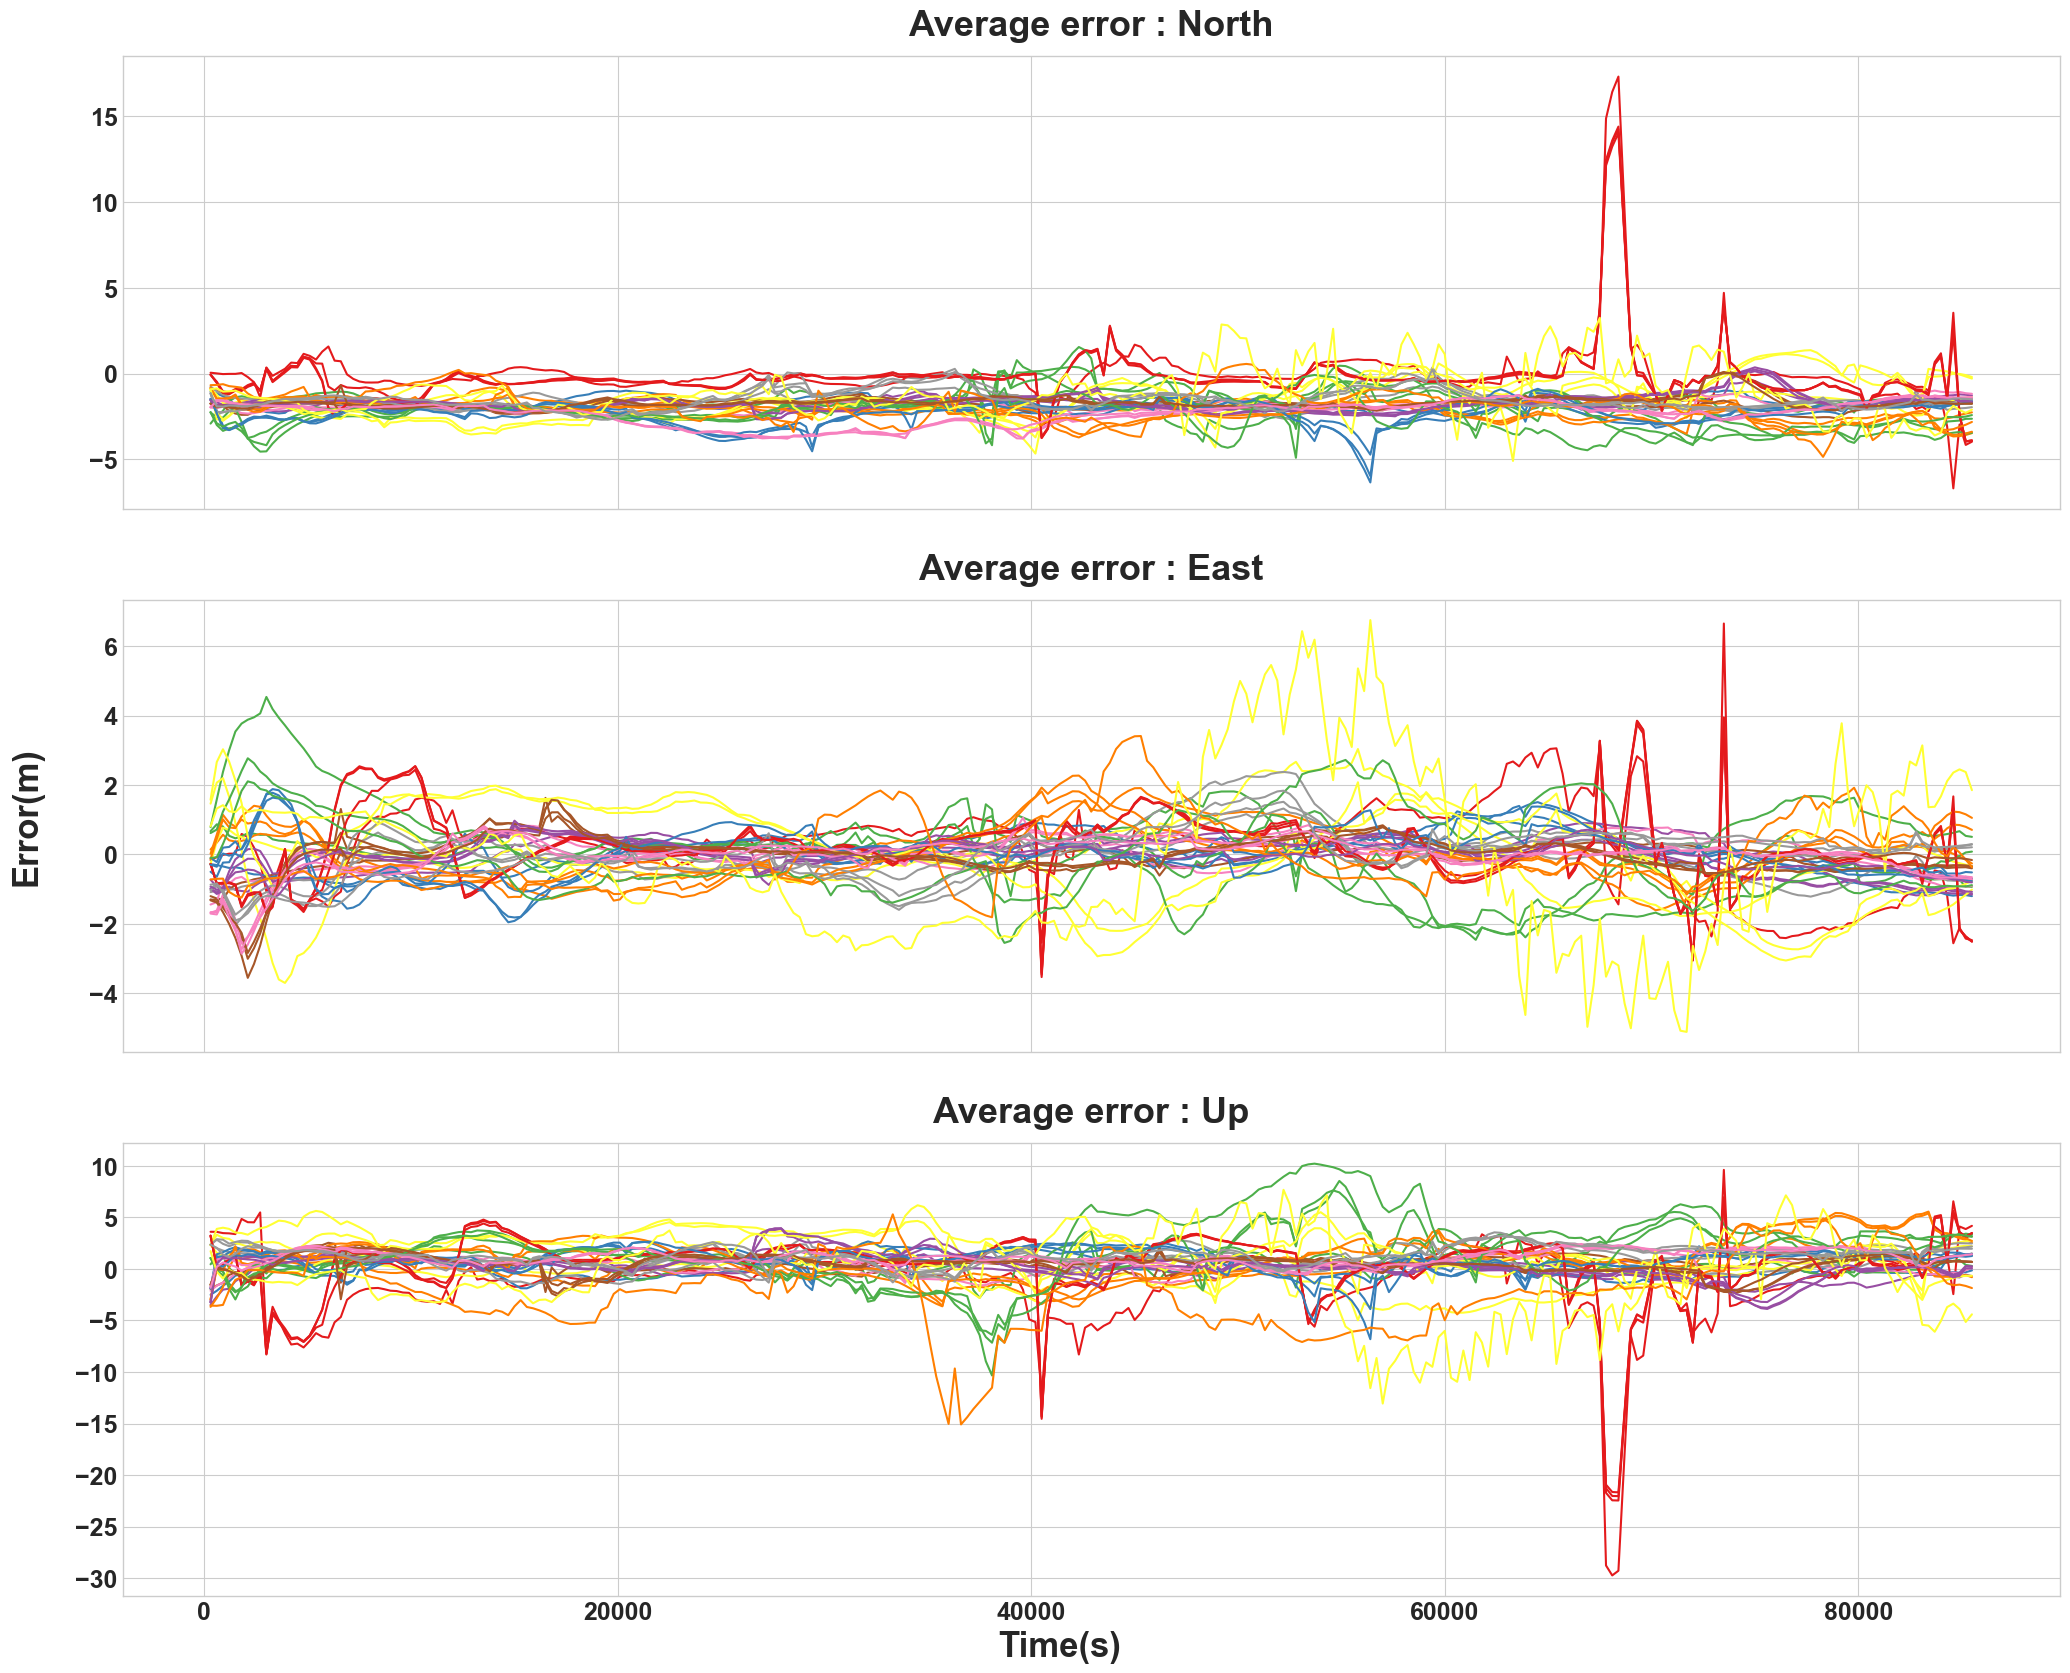

(       Time(s)             Model  Error(m) Error type  id
 0        300.0               igs    0.0507      North   0
 1        600.0               igs    0.0127      North   0
 2        900.0               igs   -0.0296      North   0
 3       1200.0               igs   -0.0179      North   0
 4       1500.0               igs   -0.0170      North   0
 ...        ...               ...       ...        ...  ..
 61435  84300.0  c1p rms pred igr    1.8210         Up   8
 61436  84600.0  c1p rms pred igr    1.9104         Up   8
 61437  84900.0  c1p rms pred igr    1.9681         Up   8
 61438  85200.0  c1p rms pred igr    1.9637         Up   8
 61439  85500.0  c1p rms pred igr    1.9574         Up   8
 
 [61440 rows x 5 columns],
 61440)

In [74]:
# df = pd.DataFrame(df_dict)
# df = df[(df['Error(m)'] < 10) & (df['Error(m)'] > -10)]
# print(df)
# df['Error(m)'] = -np.mean(df['Error(m)']) 


# error_types = ['North','East','Up']
# model_types = ['igs','c1p','klobuchar','whu rapid','jpl rapid','esa rapid','c1p rms pred igs']#,'c1p rms pred igr']
# solution_ids = [0,1,2,3,4,5,6,7,8]
# model_types = ['igs','c1p','klobuchar','whu rapid','jpl rapid','esa rapid','c1p rms pred igs','c1p rms pred igr']
model_types = ['igs','c1p','c1p rms pred igs','c1p rms pred igr']
# model_types = ['c1p rms pred igr']


from matplotlib import rc, rcParams
# rc('axes', linewidth=2)
rc('font', weight='bold')

# plt.style.use('seaborn-bright')
plt.style.use('seaborn-whitegrid')
# sns.color_palette("bright")

fig, axes = plt.subplots(3,figsize=(25,20), sharex=True, sharey=False)
# fig.tight_layout(pad=4.0)
for ax_index,err in enumerate(error_types):

    ax = axes[ax_index]
    title = 'Average error : {}'.format(err)
    ax.set_title(title,fontsize=26,fontweight='bold',pad=15)
    # ax.set_xlabel('Time(s)',fontsize=20,fontweight='bold')
    # ax.set_ylabel('Error(m)',fontsize=20,fontweight='bold')
    ax.tick_params(axis='both', which='major', labelsize=18)
    # ax.set_prop_cycle(cycler(color=plt.get_cmap('tab20c').color‌‌​​s))
    ax.set_prop_cycle(cycler(color=plt.get_cmap('Set1').colors))

    for model in model_types:

        for id in solution_ids:
        
            mask = (df['Error type'] == err) & (df['Model'] == model) & (df['id'] == id)
            line = df[mask]['Error(m)']
            time = df[mask]['Time(s)']

            # if np.abs(np.mean(line))  > 50 : line -= np.mean(line) 

            avg_line = df[mask].groupby(['Time(s)']).mean().drop(['id'], axis=1)
            # print( df[mask].groupby(['Time(s)']).mean().head())
            # ax.plot(avg_line,label=model,linewidth=4)
            # if model == 'igs' :
            ax.plot(time,line,label='{}'.format(id))
                # print(model,err,id)
            # ax.legend(prop={'weight':'bold','size':22},loc=3)
        
        # break
        # print(model)

# fig.text(0.5, -0.01, 'Time(s)', ha='center',fontsize=25,fontweight='bold')
# fig.text(-0.01, 0.5, 'Error(m)', va='center', rotation='vertical',fontsize=25,fontweight='bold')

fig.text(0.5, 0.08, 'Time(s)', ha='center',fontsize=25,fontweight='bold')
fig.text(0.08, 0.5, 'Error(m)', va='center', rotation='vertical',fontsize=25,fontweight='bold')

# plt.legend(prop={'weight':'bold','size':22})
plt.show()

df,len(df)

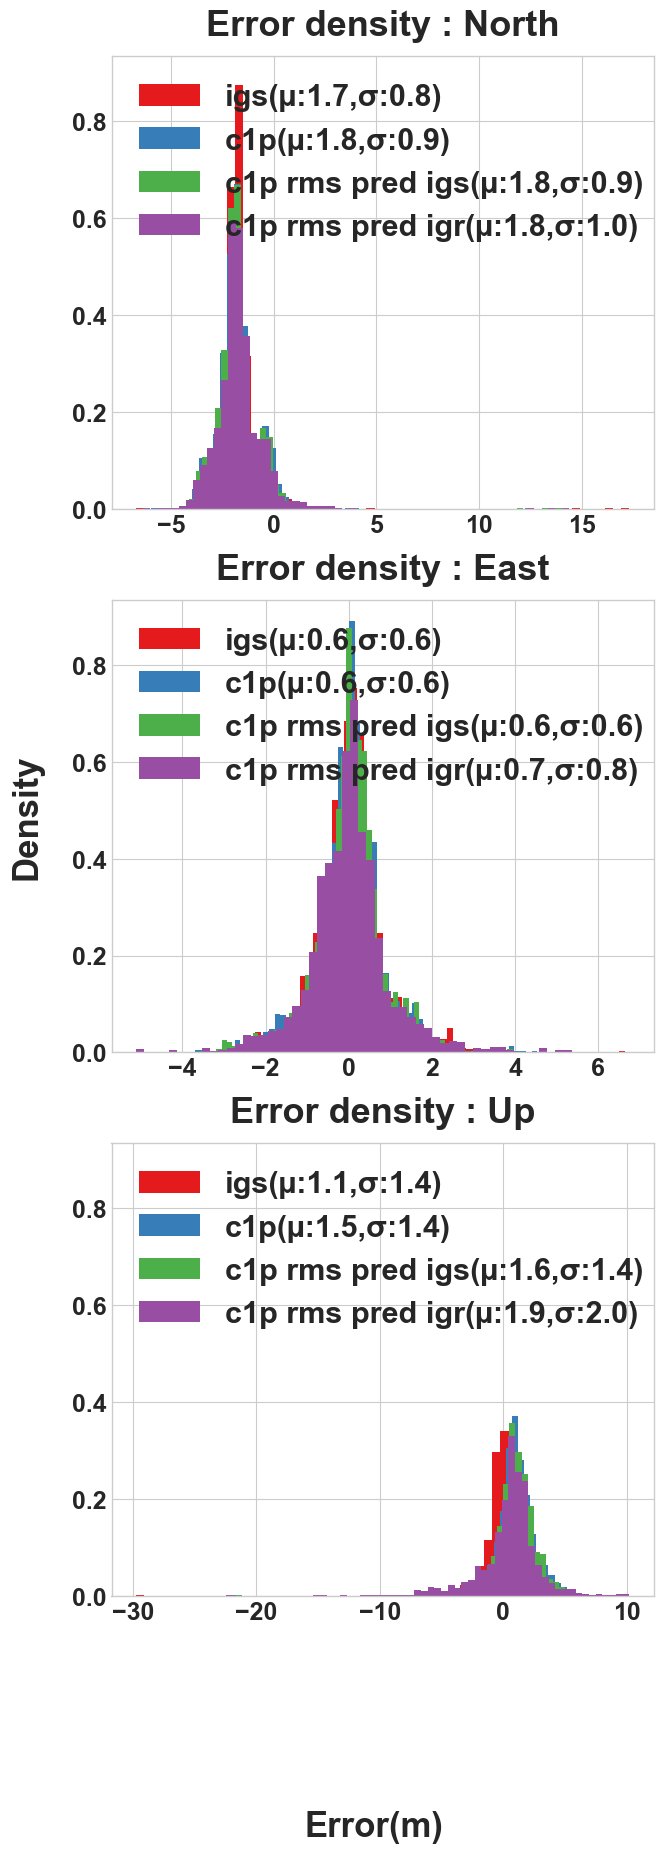

,Time(s),Model,Error(m),Error type,id
0,300.0,igs,0.0507,North,0
1,600.0,igs,0.0127,North,0
2,900.0,igs,-0.0296,North,0
3,1200.0,igs,-0.0179,North,0
4,1500.0,igs,-0.0170,North,0
...,...,...,...,...,...
61435,84300.0,c1p rms pred igr,1.8210,Up,8
61436,84600.0,c1p rms pred igr,1.9104,Up,8
61437,84900.0,c1p rms pred igr,1.9681,Up,8
61438,85200.0,c1p rms pred igr,1.9637,Up,8


In [75]:
# error_types = ['North','East','Up']
# model_types = ['c1p','klobuchar','dmd','dmdc 72h 2h shift']

from scipy.stats import norm
import statistics
from matplotlib import rc, rcParams
# rc('axes', linewidth=2)
rc('font', weight='bold')
# sns.color_palette("bright")

# plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-whitegrid')

fig, axes = plt.subplots(3,figsize=(7,20), sharex=False, sharey=True)
# fig.tight_layout(pad=4.0)
for ax_index,err in enumerate(error_types):

    ax = axes[ax_index]
    title = 'Error density : {}'.format(err)
    ax.set_title(title,fontsize=26,fontweight='bold',pad=15)
    # ax.set_xlabel('Time(s)',fontsize=20,fontweight='bold')
    # ax.set_ylabel('Error(m)',fontsize=20,fontweight='bold')
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.set_prop_cycle(cycler(color=plt.get_cmap('Set1').colors))

    for model in model_types:
        


        mask = (df['Error type'] == err) & (df['Model'] == model)  
        # line = np.abs(df[mask]['Error(m)'])
        line = df[mask]['Error(m)']
        time = df[mask]['Time(s)']


        # avg_line = df[mask].groupby(['Time(s)']).mean().to_numpy().squeeze()

        # print(avg_line.squeeze())
        try:
            mean = statistics.mean(np.abs(line))
            sd = statistics.stdev(np.abs(line))
        
            # ax.plot(avg_line, norm.pdf(avg_line, mean, sd),label=model)
            ax.hist(line,bins=60,density=True,label="{}(µ:{:.1f},σ:{:.1f})".format(model,mean,sd),linewidth=0.1)

            
            ax.legend(prop={'weight':'bold','size':22},loc='upper left')

        except:pass
        


fig.text(0.5, -0.01, 'Error(m)', ha='center',fontsize=25,fontweight='bold')
fig.text(-0.02, 0.5, 'Density', va='center', rotation='vertical',fontsize=25,fontweight='bold')

# plt.legend(prop={'weight':'bold','size':22})
plt.show()
df

(3, 2)


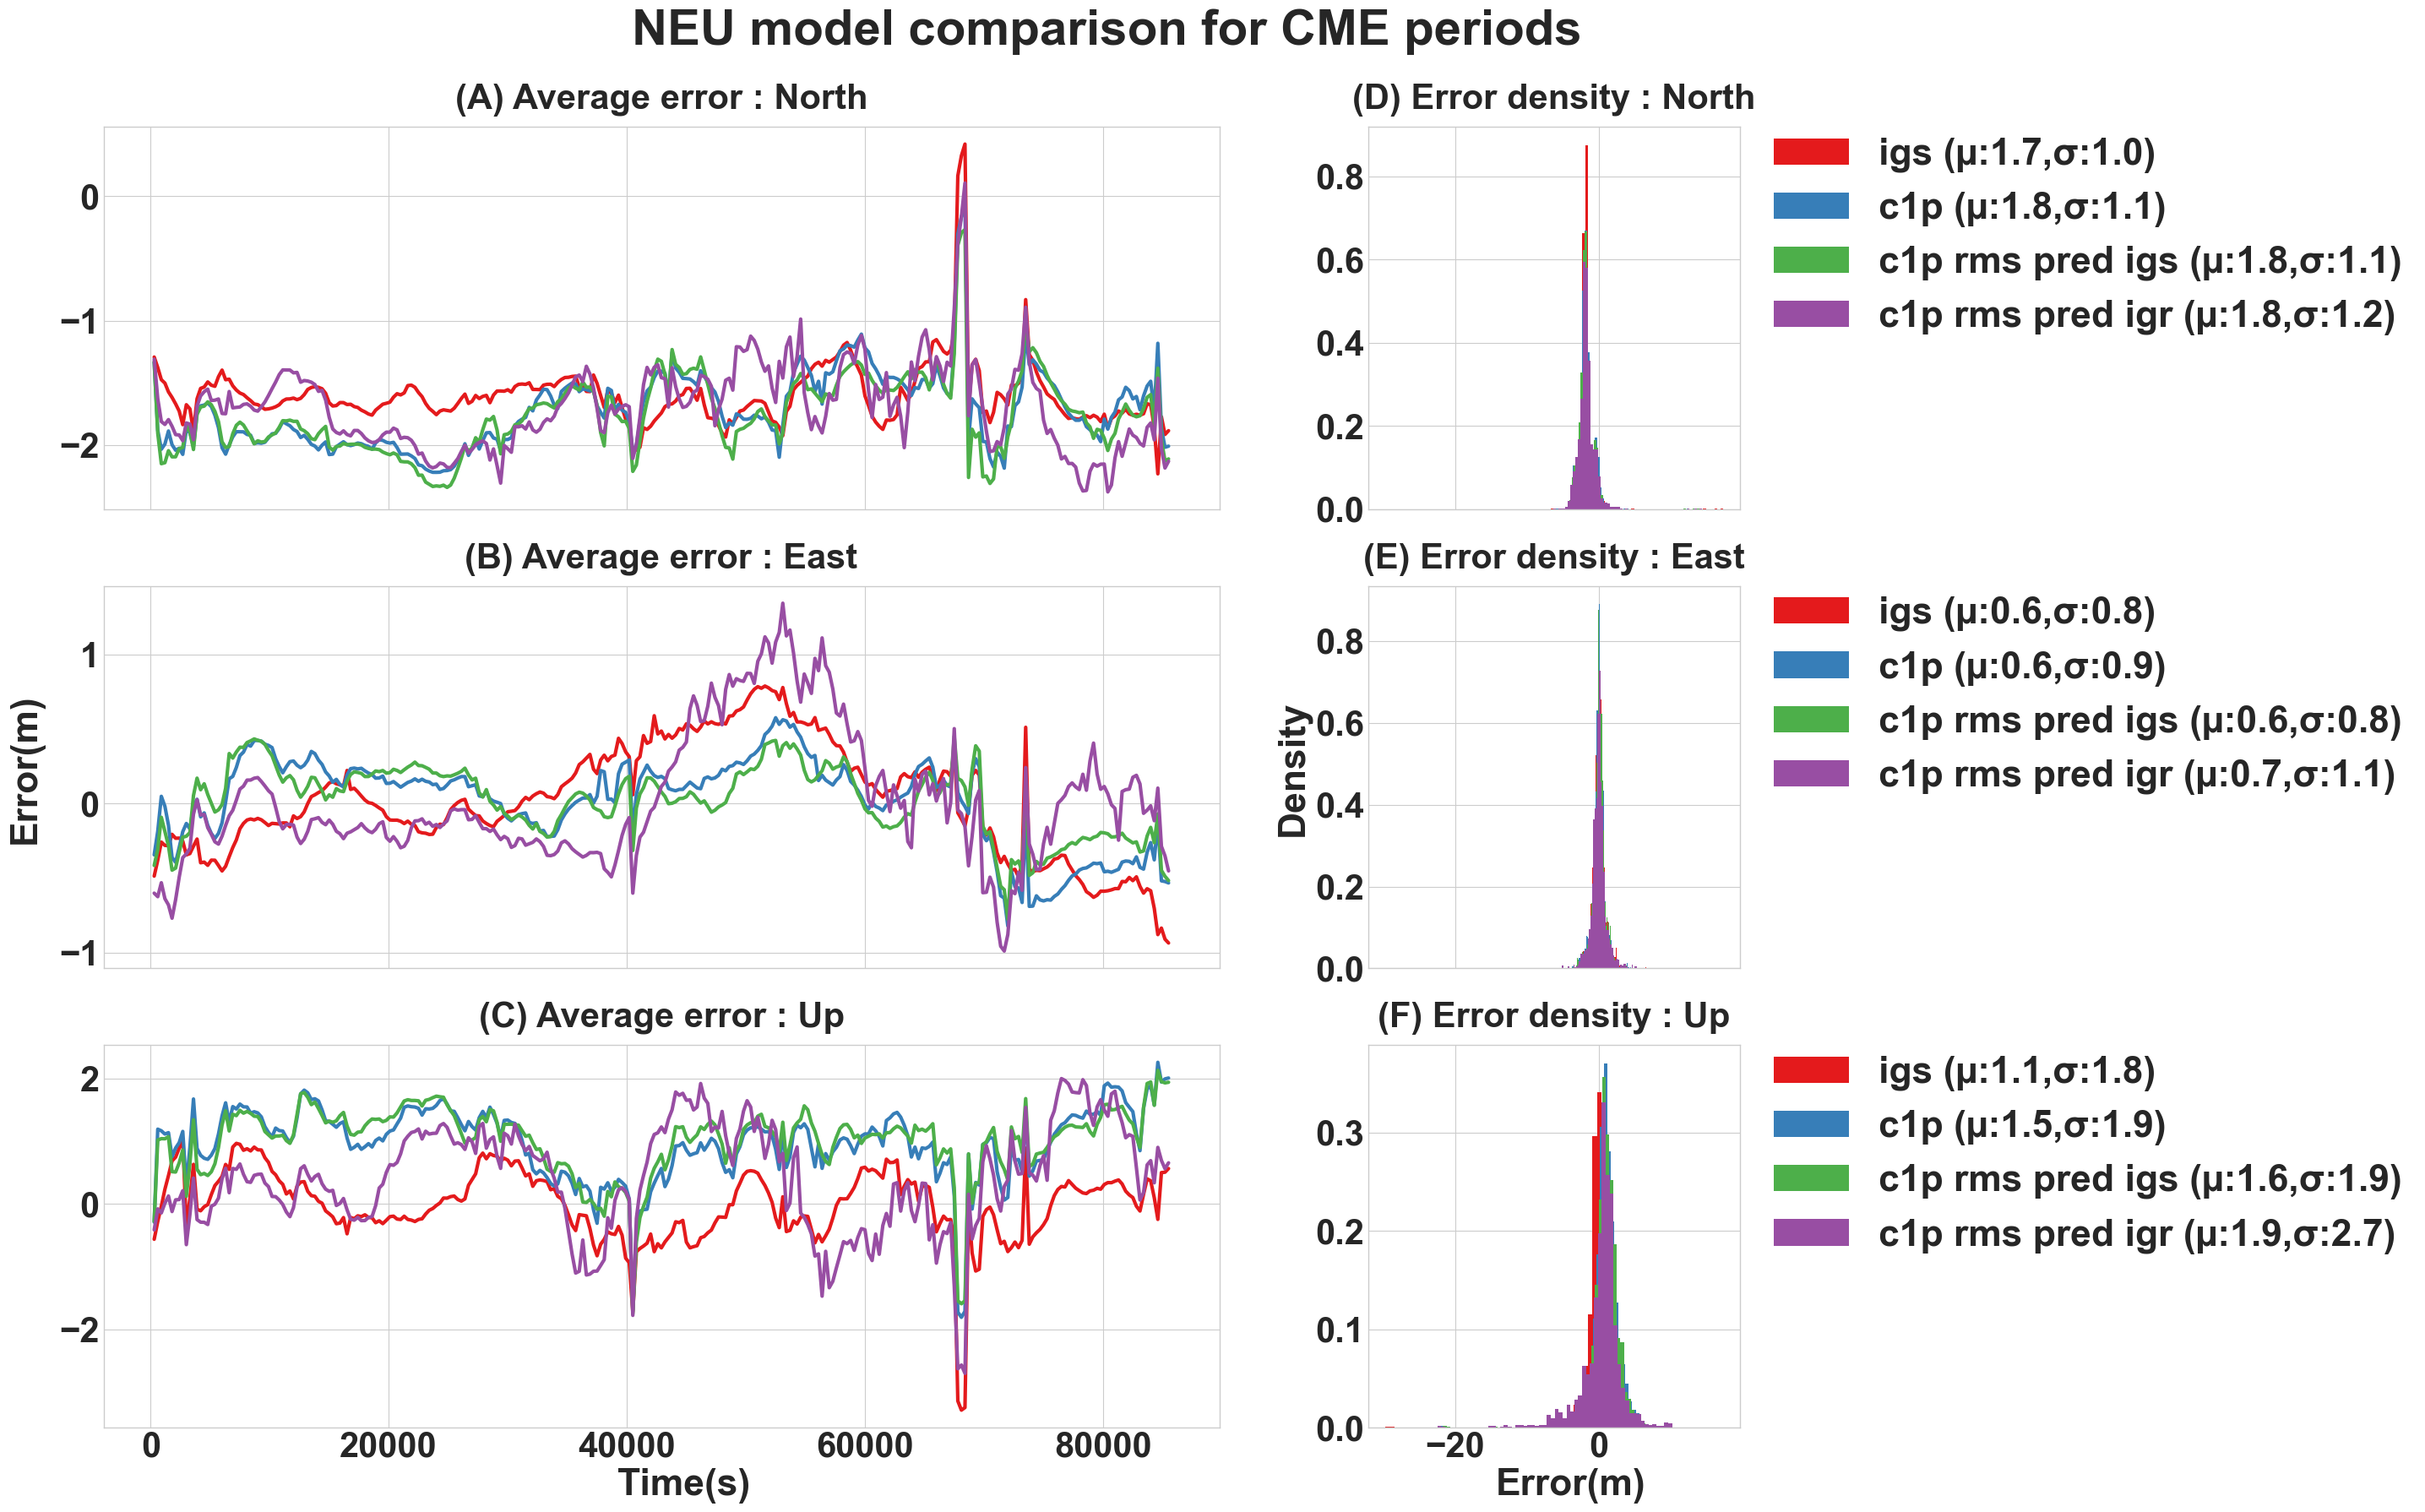

 & 1.7 & 1.8 & 1.8 & 1.8
 & 0.6 & 0.6 & 0.6 & 0.7
 & 1.1 & 1.5 & 1.6 & 1.9

 & 1.0 & 1.1 & 1.1 & 1.2
 & 0.8 & 0.9 & 0.8 & 1.1
 & 1.8 & 1.9 & 1.9 & 2.7



In [76]:
# error_types = ['North','East','Up']
# model_types = ['c1p','klobuchar','dmd','dmdc 72h 2h shift']

from scipy.stats import norm
import statistics
from matplotlib import rc, rcParams
# rc('axes', linewidth=2)
rc('font', weight='bold')
# sns.color_palette("bright")

# plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-whitegrid')

# fig, axes = plt.subplots(3,2,figsize=(25,20), sharex=True, sharey=True)
fig, axes = plt.subplots(3,2,figsize=(25,20),gridspec_kw={'width_ratios': [3, 1]},sharex='col')
fig.suptitle('NEU model comparison for {} periods'.format(period_folder.upper()) ,fontsize=42,fontweight='bold',x=3/5,y=0.95)
# fig.tight_layout(pad=4.0)
# fig.subplots_adjust(hspace=1)

latters = [['A','B','C'],['D','E','F']]
table_avg_str = ""
table_std_str = ""
print(axes.shape)

for ax_index,err in enumerate(error_types):

    
    ax = axes[ax_index][0]
    latter = latters[0][ax_index]
    title = '({}) Average error : {}'.format(latter,err)
    ax.set_title(title,fontsize=30,fontweight='bold',pad=15)
    ax.tick_params(axis='both', which='major', labelsize=30)
    ax.set_prop_cycle(cycler(color=plt.get_cmap('Set1').colors))

    
    ax1 = axes[ax_index][1]
    latter = latters[1][ax_index]
    title = '({}) Error density : {}'.format(latter,err)
    ax1.set_title(title,fontsize=30,fontweight='bold',pad=15)
    ax1.tick_params(axis='both', which='major', labelsize=30)
    ax1.set_prop_cycle(cycler(color=plt.get_cmap('Set1').colors))

    for model in model_types:
        
        mask = (df['Error type'] == err) & (df['Model'] == model)  
        line = df[mask]#['Error(m)']

        ul = line.groupby(['id']).mean()
        # print(ul)
        # print(ul,line['id'].unique())
        # for id in line['id'].unique():
        # for id in line['id'].unique():
        #     # print(id)
        #     # avg = ul.loc[id]['Error(m)']
        #     if np.abs(ul.loc[id,'Error(m)']) > 200 :line.loc[line['id']==id,'Error(m)'] -= ul.loc[id,'Error(m)']
        #     # line.loc[line['id']==id,'Error(m)'] -= ul.loc[id,'Error(m)']
        #     pass
        
        # line-=np.mean(line)
        # print(model,err,np.mean(line))

        time = df[mask]['Time(s)']

        # avg_line = df[mask].groupby(['Time(s)']).mean()
        avg_line = line.groupby(['Time(s)']).mean().drop(['id'], axis=1)
        
        snsline = line
        line = line['Error(m)']

        # print(np.min(line),np.max(line))
        try:
            mean = statistics.mean(np.abs(line))
            # sd = statistics.stdev(np.abs(line))
            # mean = statistics.mean(line)
            sd = statistics.stdev(line)

            table_avg_str += " & {:.1f}".format(mean)
            table_std_str += " & {:.1f}".format(sd)

            hist_mask = (line > -25) & (line < 25)
            ax1.hist(line,bins=60,density=True,label="{} (µ:{:.1f},σ:{:.1f})".format(model,mean,sd),linewidth=0.1)
            # ax1.hist(line[hist_mask],bins=60,density=True,label="{} (µ:{:.1f},σ:{:.1f})".format(model,mean,sd),linewidth=0.1)
            # sns.distplot(line,bins=60,label="{}(µ:{:.1f},σ:{:.1f})".format(model,mean,sd),ax=ax1)
            ax1.legend(prop={'weight':'bold','size':32},loc='upper left',bbox_to_anchor=(1,1.06))
            
            
            ax.plot(avg_line,label=model,linewidth=3)
            # ax.plot(avg_line,linewidth=3,label="{} (µ:{:.1f},σ:{:.1f})".format(model,mean,sd))
            # ax.legend(prop={'weight':'bold','size':32},loc='upper left',ncol=3)
            # sns.lineplot(data=snsline,x='Time(s)',y='Error(m)',hue="id",ax=ax)
        except Exception as e:
            print(e)

    table_avg_str += "\n"
    table_std_str += "\n"

fig.text(2/5, 0.07, 'Time(s)', ha='center',fontsize=32,fontweight='bold')
fig.text(0.08, 0.5, 'Error(m)', va='center', rotation='vertical',fontsize=32,fontweight='bold')

fig.text(4.1/5, 0.07, 'Error(m)', ha='center',fontsize=32,fontweight='bold')
fig.text(3.4/5, 0.5, 'Density', va='center', rotation='vertical',fontsize=32,fontweight='bold')

# plt.legend(prop={'weight':'bold','size':22})

plt.show()

print(table_avg_str)
print(table_std_str)


# CONVEX HULL

In [24]:
lbls = ['IGS' , 'C1P' , 'Klobuchar' , 'WHU' , 'JPL' , 'ESA' , 'DMD (IGSG-RMS-CODE)' , 'DMD (IGRG-RMS-CODE)'] 

avgs = [[1.6 , 1.9 , 2.6 , 1.7 , 1.8 , 1.7 , 1.4 , 1.4],
        [1.3 , 2.6 , 4.0 , 1.5 , 1.6 , 1.1 , 1.4 , 1.2],
        [2.1 , 3.7 , 5.2 , 3.6 , 3.8 , 2.1 , 2.6 , 2.7],                                       
        [1.2 , 1.7 , 2.1 , 1.4 , 1.4 , 1.4 , 1.4 , 1.4],
        [0.9 , 1.8 , 2.6 , 1.1 , 1.1 , 0.9 , 1.2 , 1.2],
        [1.8 , 3.3 , 4.1 , 3.0 , 3.4 , 1.9 , 2.7 , 2.5],                                        
        [1.7 , 1.8 , 2.0 , 1.6 , 1.6 , 1.9 , 1.8 , 1.8],
        [0.6 , 0.6 , 0.7 , 0.8 , 0.9 , 0.5 , 0.6 , 0.7],
        [1.1 , 1.5 , 2.2 , 2.2 , 2.7 , 1.3 , 1.6 , 1.9]]
                                        
stds = [[1.7 , 2.7 , 3.4 , 1.8 , 2.0 , 1.5 , 1.6 , 1.5],
        [1.7 , 5.2 , 6.7 , 2.0 , 2.1 , 1.7 , 2.2 , 2.0],
        [3.1 , 5.3 , 6.4 , 3.7 , 4.2 , 2.5 , 2.7 , 2.9],
        [1.3 , 2.2 , 2.5 , 1.6 , 1.7 , 1.4 , 1.6 , 1.7],
        [1.2 , 2.7 , 3.8 , 1.4 , 1.5 , 1.3 , 1.6 , 1.7],
        [2.6 , 4.6 , 5.2 , 3.2 , 3.5 , 2.4 , 3.4 , 2.8],
        [1.0 , 1.1 , 1.5 , 1.2 , 1.3 , 1.0 , 1.1 , 1.2],
        [0.8 , 0.9 , 1.1 , 1.1 , 1.2 , 0.7 , 0.8 , 1.1],
        [1.8 , 1.9 , 2.5 , 2.5 , 2.9 , 1.9 , 1.9 , 2.7]]

avgs = np.array(avgs).T
stds = np.array(stds).T

avg_std = np.column_stack((avgs.reshape(-1),stds.reshape(-1)))

avg_std = avg_std.reshape(len(lbls),-1,2)
avg_std.shape

(8, 9, 2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


{'tab:blue': '#1f77b4', 'tab:orange': '#ff7f0e', 'tab:green': '#2ca02c', 'tab:red': '#d62728', 'tab:purple': '#9467bd', 'tab:brown': '#8c564b', 'tab:pink': '#e377c2', 'tab:gray': '#7f7f7f', 'tab:olive': '#bcbd22', 'tab:cyan': '#17becf'}


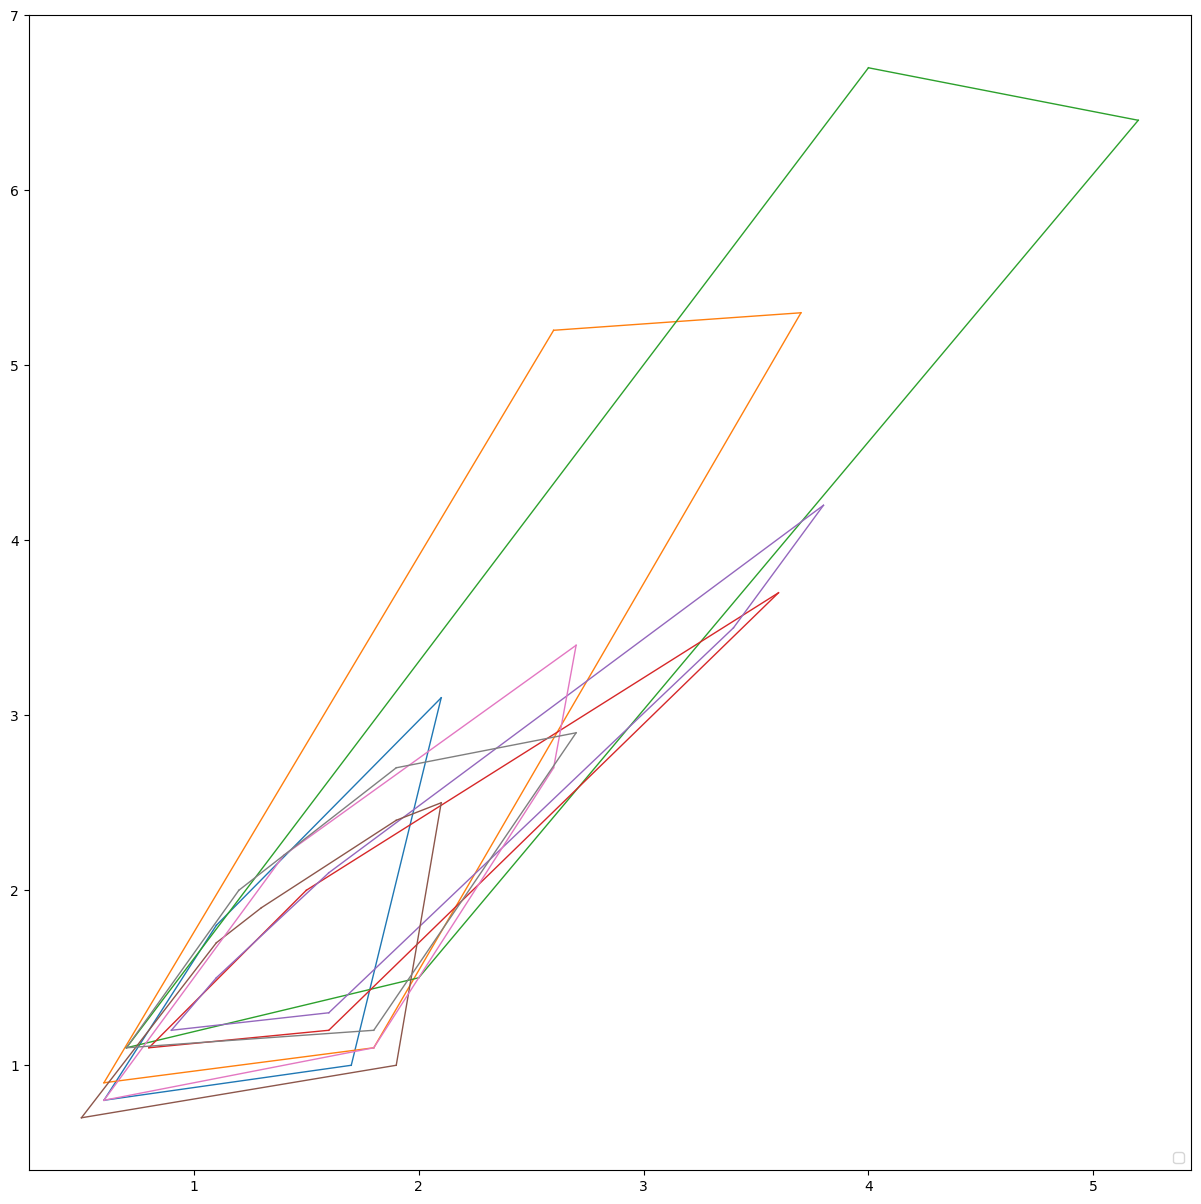

In [40]:
import matplotlib.colors as mcolors

print(mcolors.TABLEAU_COLORS)

plt.figure(figsize=(15,15))
for pset,lbl,color in zip(avg_std,lbls,mcolors.TABLEAU_COLORS.keys()):

    hull = ConvexHull(pset)
    # plt.scatter(pset[:,0], pset[:,1],label=lbl,c=color)
    for simplex in hull.simplices:
        plt.plot(pset[simplex, 0], pset[simplex, 1], '-',c=color,linewidth=1)

plt.legend(loc=4)
plt.show()

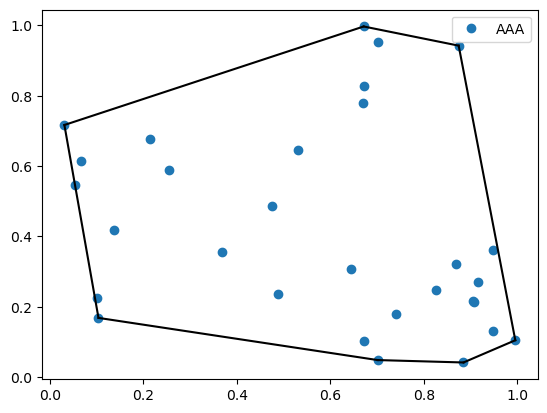

In [13]:
rng = np.random.default_rng()
points = rng.random((30, 2))   # 30 random points in 2-D
hull = ConvexHull(points)

plt.plot(points[:,0], points[:,1], 'o',label='AAA')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

plt.legend()

# CALCULATE STATISTICS

In [72]:
df_stat = df[(df['Model'] == 'c1p') | (df['Model'] == 'dmd') | (df['Model'] == 'dmdc 72h 2h shift')]

models = ['c1p','dmd','dmdc 72h 2h shift']
errors = ['North','East','Up']

for m in models:
    for e in errors:

        d = temp_df = df_stat[(df_stat['Model'] == m) & (df_stat['Error type'] == e)].describe()
        print(m,e,' AVG: ',d['Error(m)'].loc['mean'],' STD: ',d['Error(m)'].loc['std'])
        print('-------------')
        pass


# df_c1p  = df_stat[df_stat['Model'] == 'c1p'].reset_index()
# df_dmd  = df_stat[df_stat['Model'] == 'dmd'].reset_index()
# df_dmdc = df_stat[df_stat['Model'] == 'dmd 72h 2h shift'].reset_index()


c1p North  AVG:  -0.5256760750586383  STD:  2.715327402510051
-------------
c1p East  AVG:  -2.3991075438596456  STD:  5.496510547895274
-------------
c1p Up  AVG:  0.5452555121188432  STD:  5.2938795648939365
-------------
dmd North  AVG:  -2.0348437060203284  STD:  3.955679784643405
-------------
dmd East  AVG:  -4.634609824561399  STD:  7.603267344665393
-------------
dmd Up  AVG:  -9.708109695074283  STD:  8.820473891481619
-------------
dmdc 72h 2h shift North  AVG:  -1.9815160672400327  STD:  3.9574071753595996
-------------
dmdc 72h 2h shift East  AVG:  -4.58746894736842  STD:  7.626125374463139
-------------
dmdc 72h 2h shift Up  AVG:  -9.710871657544956  STD:  8.800949286966386
-------------


In [6]:
df.head()
df[df['Error(m)'] > 50]

,Time(s),Model,Error(m),Error type


<Figure size 1440x504 with 0 Axes>

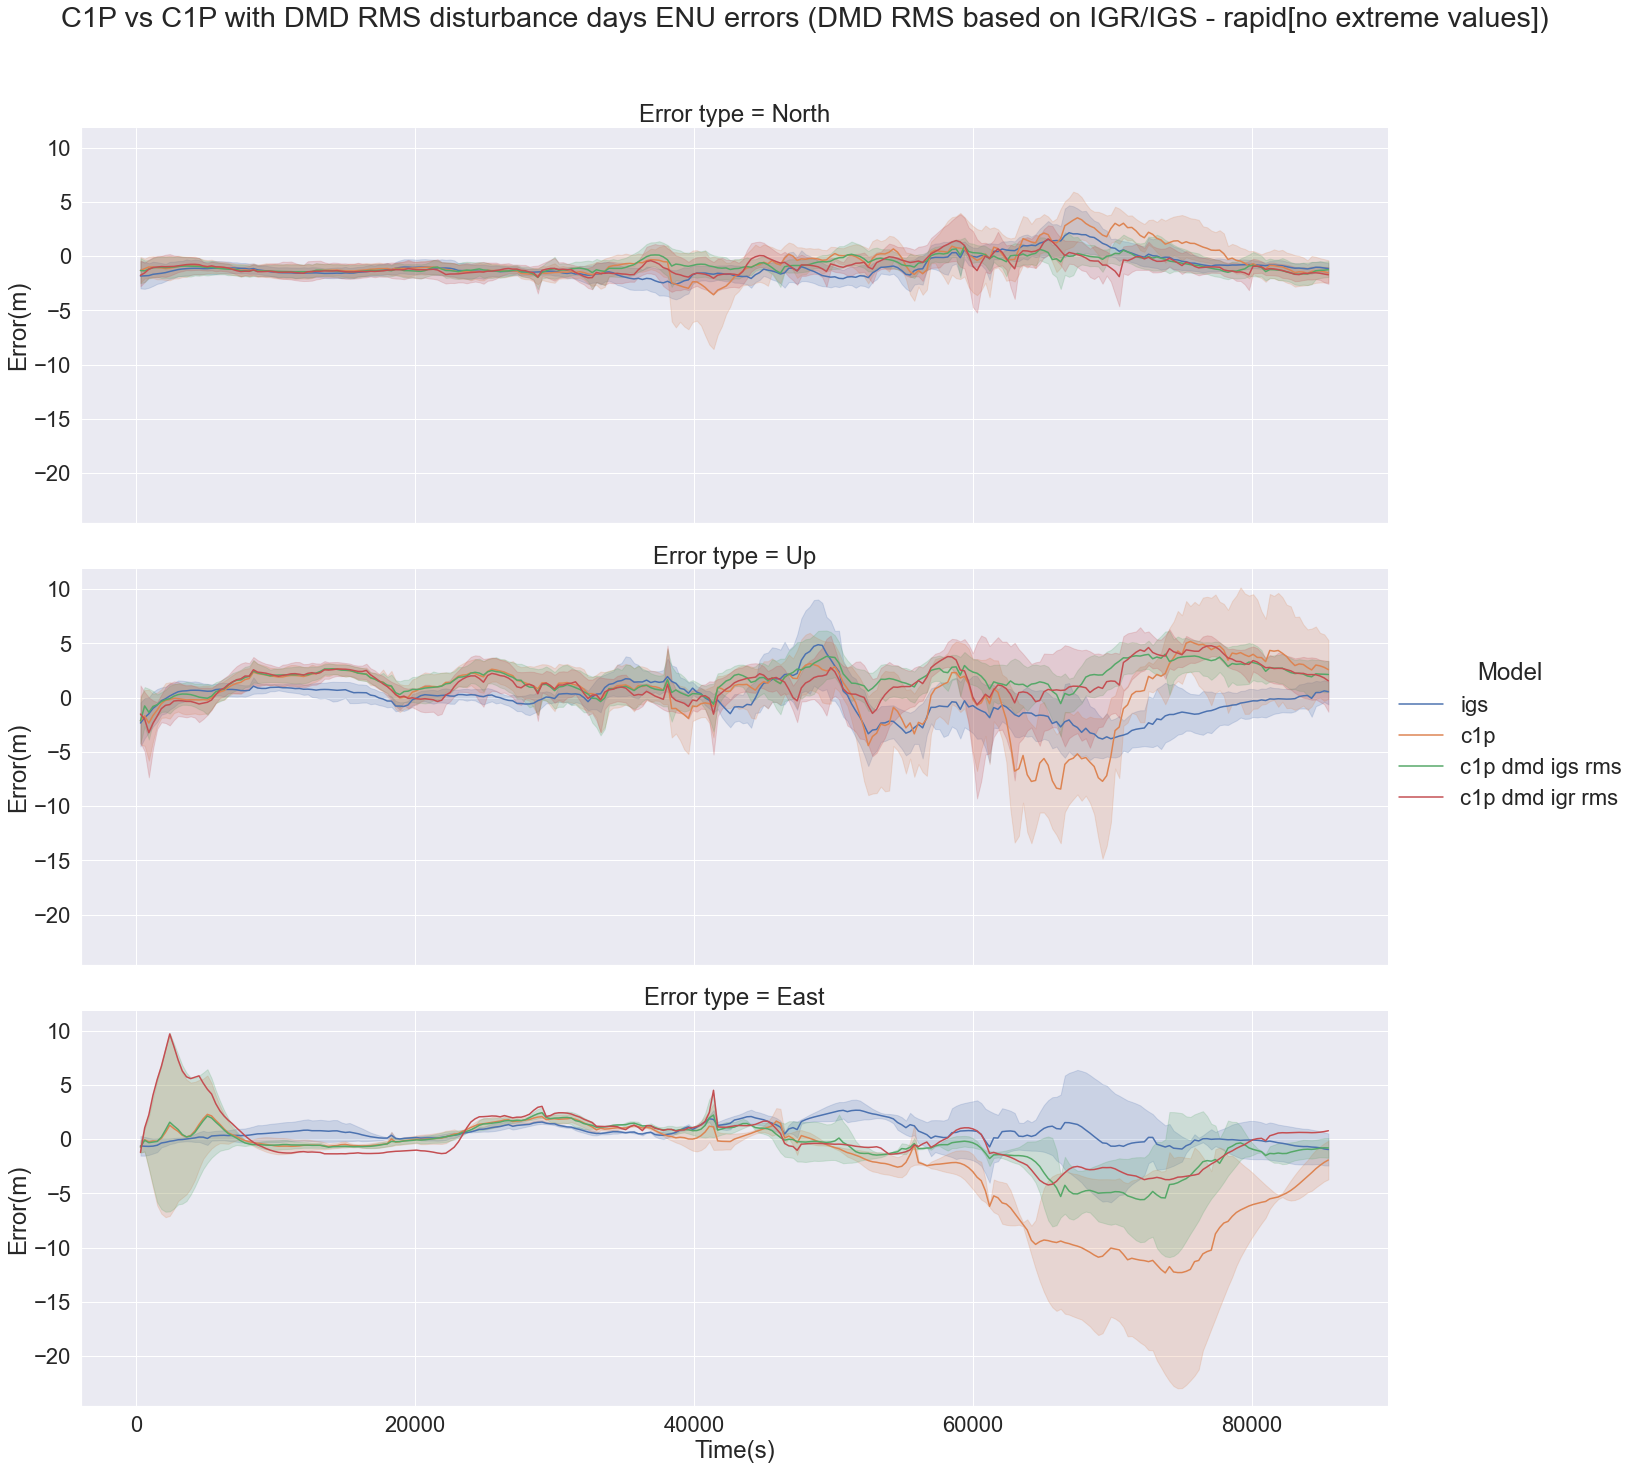

In [6]:
plt.figure(figsize=(20,7))
df_c1p = df[(df['Model'] == 'c1p') | (df['Model'] == 'c1p dmd igs rms') | (df['Model'] == 'c1p dmd igr rms')  | (df['Model'] == 'igs')]
g=sns.relplot(x="Time(s)", y="Error(m)",hue="Model", row='Error type',kind='line',data=df_c1p,height=7,aspect=20.0/7.0)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("C1P vs C1P with DMD RMS disturbance days ENU errors (DMD RMS based on IGR/IGS - rapid[no extreme values])")
plt.show()

<Figure size 1440x504 with 0 Axes>

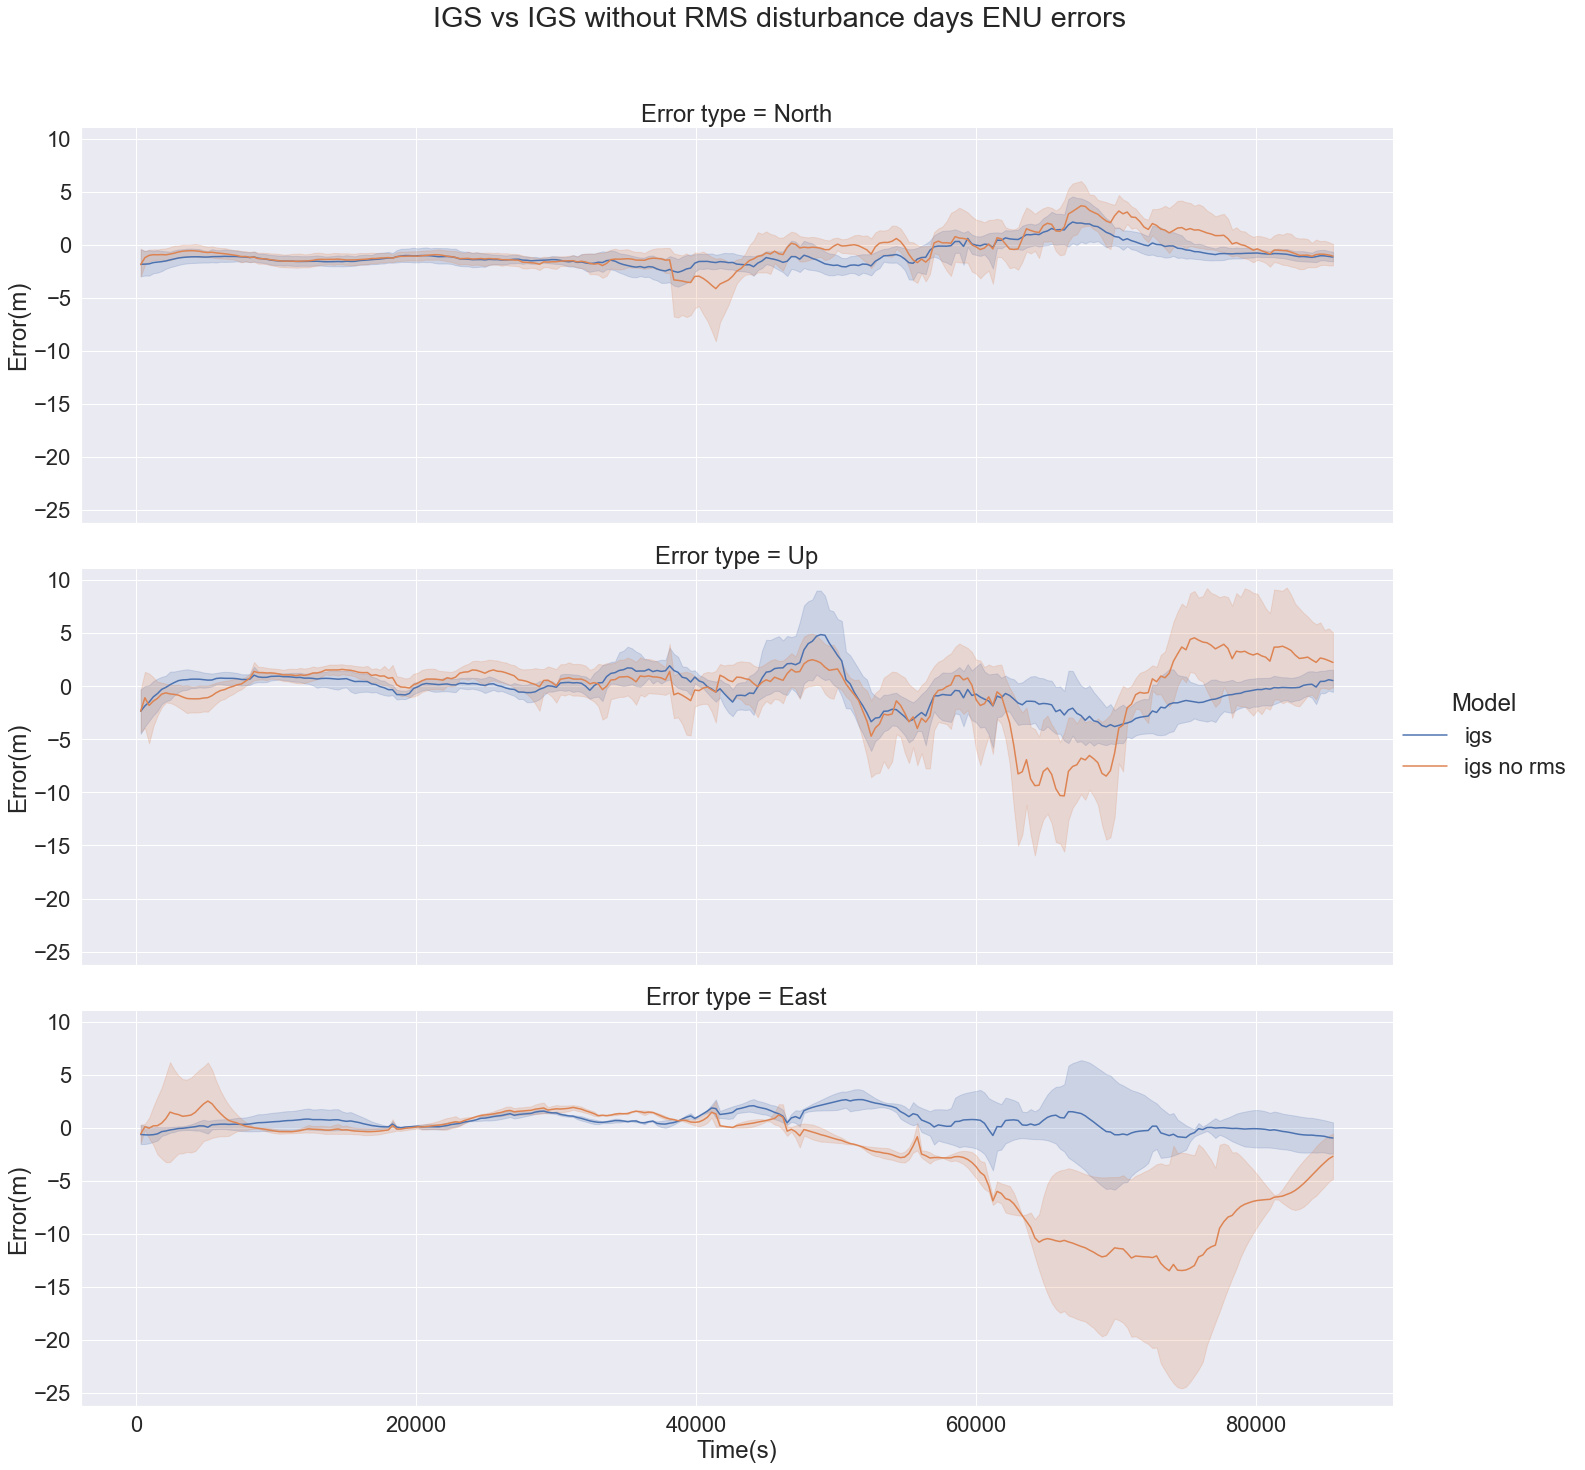

In [10]:
plt.figure(figsize=(20,7))
df_c1p = df[(df['Model'] == 'igs') | (df['Model'] == 'igs no rms')]
g=sns.relplot(x="Time(s)", y="Error(m)",hue="Model", row='Error type',kind='line',data=df_c1p,height=7,aspect=20.0/7.0)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("IGS vs IGS without RMS disturbance days ENU errors")
plt.show()